In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Esempi sintetici
## Regressione lineare
Andiamo a generare e **visualizzare** un semplice dataset monodimensionale, con relazione lineare tra feature e target:

$$
    f(x) = w_0 + w \cdot x + \varepsilon = y
$$

dove:

* $w = \sqrt{2} \rightarrow$ parametro del modello lineare
* $w_0 = -3 \rightarrow$ intercetta (aka bias)
* $x \in \mathcal{U}[-10, 10] \rightarrow$ unica feature osservata
* $y \rightarrow$ variabile target
* $\varepsilon \sim \mathcal{N}(0, 3)$ è una modellazione di [rumore additivo gaussiano](https://en.wikipedia.org/wiki/Additive_white_Gaussian_noise)

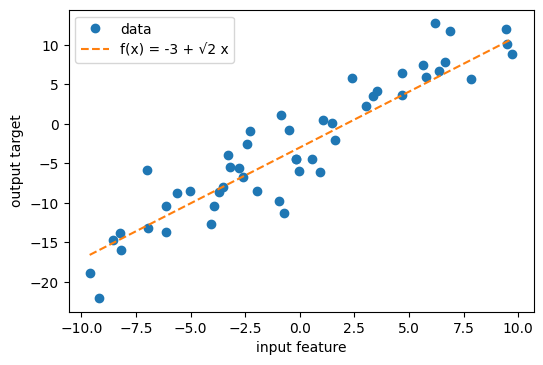

In [2]:
n_samples = 50
low = -10
high = 10

x = (high - low) * np.random.random_sample(n_samples) + low
w = np.array([-3, np.sqrt(2)])
noise = 3 * np.random.randn(n_samples)

def f(x, w):
    return w[0] + w[1]*x

y = f(x, w) + noise

x_domain = np.linspace(min(x), max(x))
y_clean = f(x_domain, w)

plt.figure(dpi=100)
plt.plot(x, y, 'o', label='data')
plt.plot(x_domain, y_clean, '--', label=f'f(x) = -3 + √2 x')
plt.xlabel('input feature')
plt.ylabel('output target')
plt.legend();

Il nostro scopo sarà quello di **quantificare** i parametri del modello ($w \approx \sqrt{2}$ e $w_0 \approx -3$), a partire dai dati.

In [3]:
from sklearn import linear_model

model = linear_model.LinearRegression().fit(x.reshape(-1, 1), y.reshape(-1, 1))

print(f"w_0: stima {model.intercept_[0]} | vero {w[0]}")
print(f"w: stima {model.coef_[0][0]} | vero {w[1]}")

w_0: stima -2.5492951989774024 | vero -3.0
w: stima 1.5151342339438871 | vero 1.4142135623730951


Andiamo ad aggiungere il nostro modello al plot.

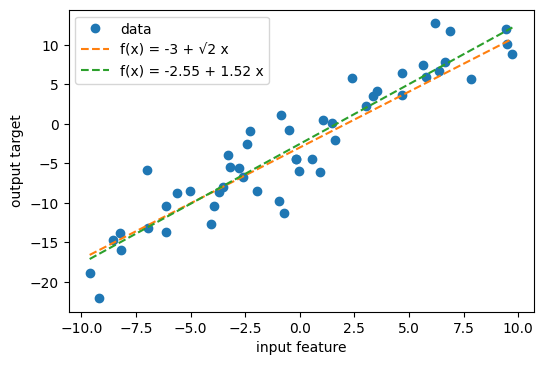

In [4]:
y_pred = model.predict(x_domain.reshape(-1, 1))

plt.figure(dpi=100)
plt.plot(x, y, 'o', label='data')
plt.plot(x_domain, y_clean, '--', label='f(x) = -3 + √2 x')
plt.plot(x_domain, y_pred, '--', label=f'f(x) = {model.intercept_[0]:.2f} + {model.coef_[0][0]:.2f} x')
plt.xlabel('input feature')
plt.ylabel('output target')
plt.legend();

## Quando la regressione lineare non basta?
Ripetiamo l'esempio precedente, ma introducendo una relazione non lineare tra input ed output.

$$
    f(x) = w_0 + \cos(\pi w \cdot x) + \varepsilon = y
$$

dove:
* $w = \sqrt{2} \rightarrow$ parametro del modello non lineare
* $w_0 = -3 \rightarrow$ intercetta (aka bias)
* $x \in \mathcal{U}[0, 2] \rightarrow$ unica feature osservata (⚠️ dominio differente rispetto a prima)
* $y \rightarrow$ variabile target
* $\varepsilon \sim \mathcal{N}(0, 0.33)$ è una modellazione di [rumore additivo gaussiano](https://en.wikipedia.org/wiki/Additive_white_Gaussian_noise)

In [5]:
def f(x, w):
    return w[0] + np.cos(w[1] * np.pi * x)

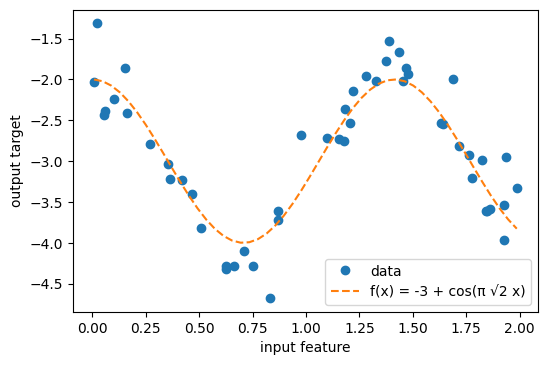

In [6]:
x = 2 * np.random.rand(n_samples)
w = np.array([-3, np.sqrt(2)])
noise =  .33 * np.random.randn(n_samples)

y = f(x, w) + noise

x_domain = np.linspace(min(x), max(x))
y_clean = f(x_domain, w)

plt.figure(dpi=100)
plt.plot(x, y, 'o', label='data')
plt.plot(x_domain, y_clean, '--', label='f(x) = -3 + cos(π √2 x)')
plt.xlabel('input feature')
plt.ylabel('output target')
plt.legend();

Ripetiamo i passi precedenti, ed applichiamo un modello lineare.

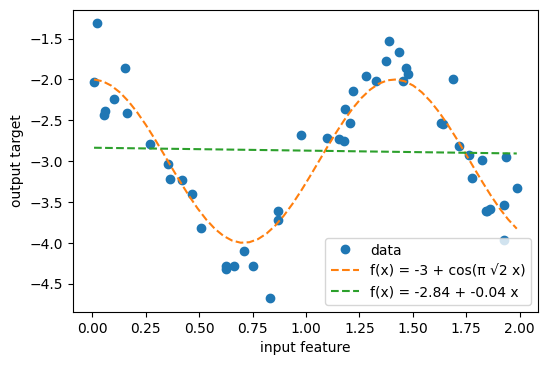

In [7]:
model = linear_model.LinearRegression().fit(x.reshape(-1, 1), y.reshape(-1, 1))
y_pred = model.predict(x_domain.reshape(-1, 1))

plt.figure(dpi=100)
plt.plot(x, y, 'o', label='data')
plt.plot(x_domain, y_clean, '--', label='f(x) = -3 + cos(π √2 x)')
plt.plot(x_domain, y_pred, '--', label=f'f(x) = {model.intercept_[0]:.2f} + {model.coef_[0][0]:.2f} x')
plt.xlabel('input feature')
plt.ylabel('output target')
plt.legend();

Il modello non approssima correttamente la relazione input/output: siamo in un caso di _underfit_.

## Cambiamo il punto di vista
Invece di cercare di approssimare la relazione input/output con un modello parametrico, proviamo un approccio non parametrico: [decision tree](https://en.wikipedia.org/wiki/Decision_tree_learning).

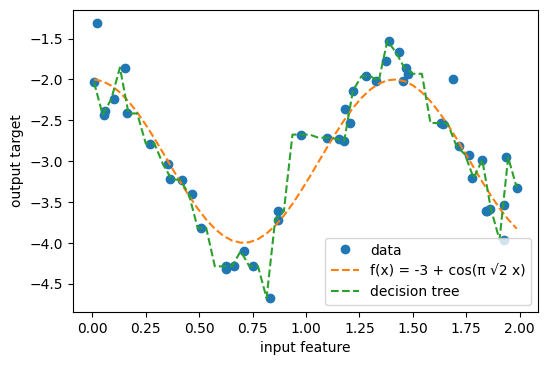

In [8]:
from sklearn import tree

model = tree.DecisionTreeRegressor(max_depth=15).fit(x.reshape(-1, 1), y.reshape(-1, 1))
y_pred = model.predict(x_domain.reshape(-1, 1))

plt.figure(dpi=100)
plt.plot(x, y, 'o', label='data')
plt.plot(x_domain, y_clean, '--', label='f(x) = -3 + cos(π √2 x)')
plt.plot(x_domain, y_pred, '--', label=f'decision tree')
plt.xlabel('input feature')
plt.ylabel('output target')
plt.legend();

Il modello insegue molto bene i dati, anche troppo: siamo in un caso di _overfit_.

Trovare il giusto trade-off tra _underfit_ ed _overfit_ è detto **model tuning**, ed è uno dei principali ostacoli che incontreremo allenando modelli di ML.

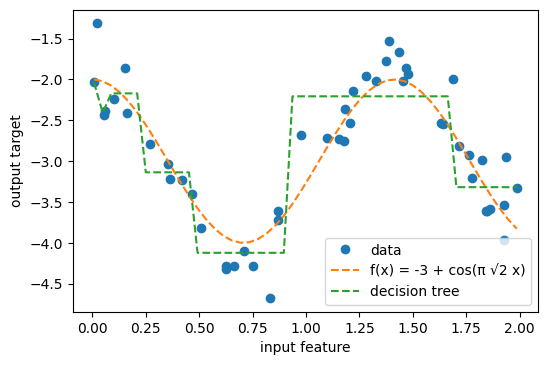

In [9]:
model = tree.DecisionTreeRegressor(max_depth=3).fit(x.reshape(-1, 1), y.reshape(-1, 1))
y_pred = model.predict(x_domain.reshape(-1, 1))

plt.figure(dpi=100)
plt.plot(x, y, 'o', label='data')
plt.plot(x_domain, y_clean, '--', label='f(x) = -3 + cos(π √2 x)')
plt.plot(x_domain, y_pred, '--', label=f'decision tree')
plt.xlabel('input feature')
plt.ylabel('output target')
plt.legend();

# Use case reale: `MiMocko`
**Domanda business**: fornire alert agli utenti in fase di noleggio se la batteria rischia di non reggere la durata del viaggio indicato.

$$
    \downarrow
$$

**ML task**: allenare un modello di _regressione_ che risolva il seguente problema: `f(dati di viaggio) ≈ carica batteria termine`.

## Caricamento e preparazione dati

In [10]:
path_to_file='/Users/A00018533/Desktop/'
# path_to_file = 'data/'

In [11]:
viaggi = pd.read_csv(
    f'{path_to_file}/viaggi.csv',
    sep='*',
    decimal=','
)

In [12]:
viaggi.head(2)

,idUtente,idVeicolo,caricaBatteriaInizio,dueCaschiDisponibili,luogoRitiro,timestampRitiro,luogoConsegna,timestampConsegna,distanzaPercorsa,tempoViaggio,punteggioViaggio,caricaBatteriaFine
0,u5954,v33,100.0%,YES,"[(44.394923, 8.943928), (44.394857, 8.943474),...","['2018-10-01 01:08:57', '2018-10-01 01:09:02',...","[(44.433961, 8.95907), (44.434021, 8.958851), ...","['2018-10-01 01:21:57', '2018-10-01 01:22:02',...",4.5046 km,0:13:20,7.55,90.2%
1,u1478,v33,91.8%,NaN,"[(44.433997, 8.958993), (44.433596, 8.959153),...","['2018-10-01 02:09:21', '2018-10-01 02:09:26',...","[(44.396783, 8.940881), (44.396705, 8.940446),...","['2018-10-01 02:21:06', '2018-10-01 02:21:11',...",4.3622 km,0:12:05,7.78,81.8%


## Selezioniamo solo le colonne _interessanti_

In [13]:
columns = ['caricaBatteriaInizio', 'distanzaPercorsa', 'tempoViaggio', 'punteggioViaggio', 'caricaBatteriaFine']
data = viaggi[columns]
data.head()

,caricaBatteriaInizio,distanzaPercorsa,tempoViaggio,punteggioViaggio,caricaBatteriaFine
0,100.0%,4.5046 km,0:13:20,7.55,90.2%
1,91.8%,4.3622 km,0:12:05,7.78,81.8%
2,100.0%,9.2642 km,0:27:41,8.02,82.6%
3,100.0%,9.4183 km,0:28:45,8.23,84.2%
4,100.0%,5.4345 km,0:18:37,5.20,88.0%


## Abbiamo presenza di valori mancanti?
Se sì, scegliamo di eliminare le righe corrispondenti.

In [14]:
pd.isnull(data).sum(axis=0)

caricaBatteriaInizio       0
distanzaPercorsa           0
tempoViaggio            6350
punteggioViaggio        1203
caricaBatteriaFine         0
dtype: int64

In [15]:
data = data.dropna()
data

,caricaBatteriaInizio,distanzaPercorsa,tempoViaggio,punteggioViaggio,caricaBatteriaFine
0,100.0%,4.5046 km,0:13:20,7.55,90.2%
1,91.8%,4.3622 km,0:12:05,7.78,81.8%
2,100.0%,9.2642 km,0:27:41,8.02,82.6%
3,100.0%,9.4183 km,0:28:45,8.23,84.2%
4,100.0%,5.4345 km,0:18:37,5.20,88.0%
...,...,...,...,...,...
124832,100.0%,4.192 km,0:13:15,7.48,91.8%
124833,100.0%,3.8649 km,0:13:07,5.65,92.3%
124834,100.0%,4.9921 km,0:16:14,5.26,92.1%
124835,100.0%,2.6225 km,0:08:24,7.52,97.0%


**(BONUS)** per gestire valori mancanti è anche possibile utilizzare il modulo (`sklearn.impute`)[https://scikit-learn.org/stable/modules/impute.html].

## Preprocessiamo i dati e prepariamo il nostro learning set
Di che tipo sono le colonne estratte? Sono pronte per essere analizzate?

In [16]:
data.dtypes

caricaBatteriaInizio     object
distanzaPercorsa         object
tempoViaggio             object
punteggioViaggio        float64
caricaBatteriaFine       object
dtype: object

In [17]:
data.loc[:, 'caricaBatteriaInizio'] = data['caricaBatteriaInizio'].str.replace('%', '').astype(float)
data.loc[:, 'distanzaPercorsa'] = data['distanzaPercorsa'].str.replace(' km', '').astype(float)
data.loc[:, 'tempoViaggio'] = data['tempoViaggio'].apply(lambda x: pd.to_timedelta(x).seconds)
data.loc[:, 'caricaBatteriaFine'] = data['caricaBatteriaFine'].str.replace('%', '').astype(float)

In [18]:
data.dtypes

caricaBatteriaInizio    float64
distanzaPercorsa        float64
tempoViaggio              int64
punteggioViaggio        float64
caricaBatteriaFine      float64
dtype: object

## Data exploration (minimale)

In [19]:
data.describe()

,caricaBatteriaInizio,distanzaPercorsa,tempoViaggio,punteggioViaggio,caricaBatteriaFine
count,117335.000000,117335.000000,117335.000000,117335.000000,117335.000000
mean,98.722885,6.076312,1100.079899,7.165235,88.512377
std,4.660199,4.670436,850.960132,1.254188,9.309868
min,4.000000,0.000000,0.000000,4.820000,-36.100000
25%,100.000000,2.257800,406.000000,5.640000,83.900000
50%,100.000000,5.178400,933.000000,7.490000,90.700000
75%,100.000000,8.910750,1607.000000,8.380000,95.500000
max,100.000000,25.711300,5361.000000,9.280000,103.100000


<ipython-input-20-43bea75bb78a>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data.hist(ax=ax)


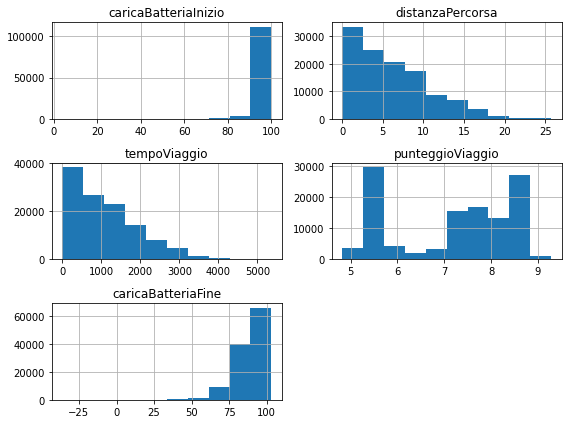

In [20]:
ax = plt.figure(figsize=(8, 6)).gca()
data.hist(ax=ax)
plt.tight_layout();

## Separiamo le _features_ dal _target_

In [21]:
target = columns[-1]
features = columns[:-1]

print(target)
print(features)

caricaBatteriaFine
['caricaBatteriaInizio', 'distanzaPercorsa', 'tempoViaggio', 'punteggioViaggio']


In [22]:
dfX = data[features]
dfy = data[target]

In [23]:
dfX

,caricaBatteriaInizio,distanzaPercorsa,tempoViaggio,punteggioViaggio
0,100.0,4.5046,800,7.55
1,91.8,4.3622,725,7.78
2,100.0,9.2642,1661,8.02
3,100.0,9.4183,1725,8.23
4,100.0,5.4345,1117,5.20
...,...,...,...,...
124832,100.0,4.1920,795,7.48
124833,100.0,3.8649,787,5.65
124834,100.0,4.9921,974,5.26
124835,100.0,2.6225,504,7.52


In [24]:
dfy

0         90.2
1         81.8
2         82.6
3         84.2
4         88.0
          ... 
124832    91.8
124833    92.3
124834    92.1
124835    97.0
124836    95.0
Name: caricaBatteriaFine, Length: 117335, dtype: float64

## Train/Test split
🔥 Fase **fondamentale** per capire quanto bene il nostro modello possa funzionare in produzione.

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.33)
X_train.head()

,caricaBatteriaInizio,distanzaPercorsa,tempoViaggio,punteggioViaggio
22349,100.0,1.9040,342,7.60
34491,100.0,2.9690,596,5.74
84803,100.0,8.9971,1565,8.46
108613,93.2,8.6840,1504,7.65
93047,100.0,1.8844,342,7.35


Quanto sono grandi i due set?

In [27]:
print(X_train.shape)
print(X_test.shape)

(78614, 4)
(38721, 4)


## Linear Model
### Training
Alleniamo un modello linere ed otteniamo una rappresentazione del tipo:

`target = bias + w_1 * feat_1 + w_2 * feat_2 + ... `

In [28]:
from sklearn import linear_model

model = linear_model.LinearRegression().fit(X_train, y_train)

equation = f"{target} = {model.intercept_:.3f}"
for c, f in zip(model.coef_, features):
    equation += f" + {c:.3f} * {f}"
print(equation)

caricaBatteriaFine = -7.878 + 1.031 * caricaBatteriaInizio + -1.367 * distanzaPercorsa + -0.001 * tempoViaggio + 0.486 * punteggioViaggio


## Assessment
Analizziamo il Mean Absolute Error ([MAE](https://en.wikipedia.org/wiki/Mean_absolute_error)) ed il Coefficient of determination ([R2](https://en.wikipedia.org/wiki/Coefficient_of_determination)).

In [29]:
from sklearn import metrics

y_train_pred = model.predict(X_train)

print('Train scores')
print(f"MAE = {metrics.mean_absolute_error(y_train, y_train_pred):.3f}")
print(f"R2 = {metrics.r2_score(y_train, y_train_pred):.3f}")

Train scores
MAE = 2.492
R2 = 0.839


In [30]:
y_pred = model.predict(X_test)

print('Test scores')
print(f"MAE = {metrics.mean_absolute_error(y_test, y_pred):.3f}")
print(f"R2 = {metrics.r2_score(y_test, y_pred):.3f}")

Test scores
MAE = 2.473
R2 = 0.844


Cosa possiamo concludere?

## Decision tree
### Training

Alleniamo il modello ed osserviamo le regole imparate.

In [31]:
from sklearn import tree

model = tree.DecisionTreeRegressor(max_depth=None).fit(X_train, y_train)

n_rows = 15
print('\n'.join(tree.export_text(model, feature_names=features).split('\n')[:n_rows]))

|--- distanzaPercorsa <= 7.79
|   |--- caricaBatteriaInizio <= 90.85
|   |   |--- caricaBatteriaInizio <= 78.75
|   |   |   |--- caricaBatteriaInizio <= 64.60
|   |   |   |   |--- caricaBatteriaInizio <= 52.95
|   |   |   |   |   |--- caricaBatteriaInizio <= 32.55
|   |   |   |   |   |   |--- caricaBatteriaInizio <= 27.45
|   |   |   |   |   |   |   |--- value: [14.70]
|   |   |   |   |   |   |--- caricaBatteriaInizio >  27.45
|   |   |   |   |   |   |   |--- tempoViaggio <= 1159.00
|   |   |   |   |   |   |   |   |--- value: [17.50]
|   |   |   |   |   |   |   |--- tempoViaggio >  1159.00
|   |   |   |   |   |   |   |   |--- value: [18.40]
|   |   |   |   |   |--- caricaBatteriaInizio >  32.55
|   |   |   |   |   |   |--- caricaBatteriaInizio <= 43.70


**(BONUS)** per alberi/dataset _relativamente_ piccoli, è possibile ottenere una rappresentazione grafica con (`dtreeviz`)[https://github.com/parrt/dtreeviz].

```python
from dtreeviz.trees import dtreeviz

viz = dtreeviz(model, X_train, y_train,
               target_name=target,
               feature_names=features)

viz.save("decision_tree.svg")
```

## Assessment

In [32]:
y_train_pred = model.predict(X_train)

print('Train scores')
print(f"MAE = {metrics.mean_absolute_error(y_train, y_train_pred):.3f}")
print(f"R2 = {metrics.r2_score(y_train, y_train_pred):.3f}")

Train scores
MAE = 0.002
R2 = 1.000


In [33]:
y_pred = model.predict(X_test)

print('Test scores')
print(f"MAE = {metrics.mean_absolute_error(y_test, y_pred):.3f}")
print(f"R2 = {metrics.r2_score(y_test, y_pred):.3f}")

Test scores
MAE = 2.923
R2 = 0.782


Cosa possiamo concludere?

# (Bonus) Hyperparameter tuning
Al contrario della semplice regressione lineare, l'albero decisionale ha un parametro importante: la profondità. Scriviamo una pipeline automatica per ottimizzarne il valore.

In [34]:
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV

model = RandomizedSearchCV(estimator=tree.DecisionTreeRegressor(),
                           param_distributions={'max_depth': stats.randint(2, 50)},
                           n_iter=10).fit(X_train, y_train)

In [35]:
model.best_estimator_

DecisionTreeRegressor(max_depth=10)

In [36]:
y_train_pred = model.predict(X_train)

print('Train scores')
print(f"MAE = {metrics.mean_absolute_error(y_train, y_train_pred):.3f}")
print(f"R2 = {metrics.r2_score(y_train, y_train_pred):.3f}")

Train scores
MAE = 2.119
R2 = 0.899


In [37]:
y_pred = model.predict(X_test)

print('Test scores')
print(f"MAE = {metrics.mean_absolute_error(y_test, y_pred):.3f}")
print(f"R2 = {metrics.r2_score(y_test, y_pred):.3f}")

Test scores
MAE = 2.267
R2 = 0.880
